# Aprenzigem supervisionada 
# Regressão Logistica

A regressão logistica é uma tecnica de modelagem usada para prever a probabilidade de um evento binario com duas possiveis saidas ocorrer, com base em uma ou mais variaveis independentes

- Caracteristicas principais: 
     - Natureza Binaria: è usada principalmente para problemas onde o resultado é binario Exemplos(Sucesso/falha, sim/não, 1/0)
     - Função sigmoide(Logistica:)A regressão logistica utiliza a função sigmoide(logistica) para modelar a probabilidade de um evento ocorrer. A função sigmoide mapeia qualquer valor real para um intervalo entre 1 e 0
     - Probabilidade: O resultado da regressão logistica é uma probabilidade que pode ser convertida em uma provião binaria com base em um limiar (geralmnete 0.5)

- __CLASSIFICAÇÂO__

        - Filtro de Spam
        - Tradutor de Texto
        - Reconhecimento de tumores em imagem
        - Detecção de Fraudes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
url = "C:/Users/Guilherme/OneDrive/Área de Trabalho/Pratices_DataScience/aulas_pandas/titanic.csv"

In [3]:
df = pd.read_csv(url,sep=',',header=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df.drop('Cabin',axis=1,inplace=True)#Removendo a coluna com maior valores vazio que não agrega valor ao estudo de caso

In [8]:
df['Age'].fillna(df['Age'].median(),inplace=True)#Aplicando uma media para valores vazios no campo idade


In [9]:
df.dropna(subset=['Age'],inplace=True)# Outra maneira é removendo os valores faltante do campo idade

In [10]:
df.dropna(subset=['Embarked'],inplace=True)

In [11]:
df = pd.get_dummies(df, columns=['Sex','Embarked'],drop_first=True)

In [12]:
X= df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]
y = df['Survived']

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Acuracia:{accuracy:.2f}')

mat_con = confusion_matrix(y_test,y_pred)
print(f'Matriz de Confusão:')
print(mat_con)




Acuracia:0.79
Matriz de Confusão:
[[136  31]
 [ 25  75]]


In [17]:
# Relatório de classificação
report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       167
           1       0.71      0.75      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [18]:
# Criando faixas etárias
bins = [0, 12, 18, 30, 50, 80]
labels = ['Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']
df['Faixa_Etaria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [19]:
# Calculando a porcentagem de sobrevivência por faixa etária e sexo
survival_rate = df.groupby(['Faixa_Etaria', 'Sex_male'], observed=True)['Survived'].mean().reset_index()
survival_rate['Sex'] = survival_rate['Sex_male'].map({0: 'Feminino', 1: 'Masculino'})
survival_rate.drop('Sex_male', axis=1, inplace=True)

# Verificando o DataFrame survival_rate
print(survival_rate)

   Faixa_Etaria  Survived  Sex
0       Criança  0.593750  NaN
1       Criança  0.555556  NaN
2   Adolescente  0.826087  NaN
3   Adolescente  0.136364  NaN
4  Jovem Adulto  0.710345  NaN
5  Jovem Adulto  0.145215  NaN
6        Adulto  0.780220  NaN
7        Adulto  0.213415  NaN
8         Idoso  0.904762  NaN
9         Idoso  0.117647  NaN


In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Survived', hue='Sex', data=survival_rate)
plt.title('Porcentagem de Sobreviventes por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem de Sobrevivência')
plt.show()

c:\Users\Guilherme\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

   Faixa_Etaria        Sex  Survived
0       Criança   Feminino  0.593750
1       Criança  Masculino  0.555556
2   Adolescente   Feminino  0.826087
3   Adolescente  Masculino  0.136364
4  Jovem Adulto   Feminino  0.710345
5  Jovem Adulto  Masculino  0.145215
6        Adulto   Feminino  0.780220
7        Adulto  Masculino  0.213415
8         Idoso   Feminino  0.904762
9         Idoso  Masculino  0.117647


c:\Users\Guilherme\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Guilherme\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


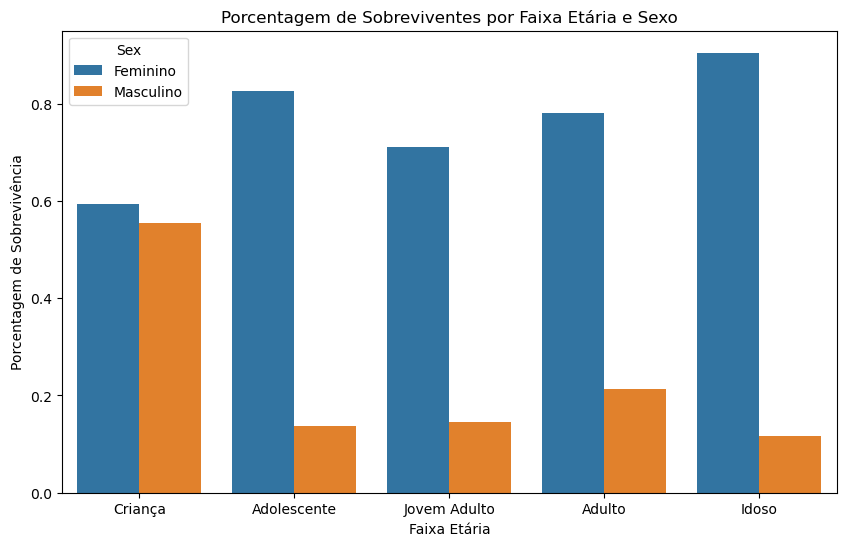

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
url = "C:/Users/Guilherme/OneDrive/Área de Trabalho/Pratices_DataScience/aulas_pandas/titanic.csv"
df = pd.read_csv(url, sep=',', header=0)

# Pré-processamento
df.drop('Cabin', axis=1, inplace=True)  # Removendo a coluna com maior quantidade de valores vazios
df['Age'].fillna(df['Age'].median(), inplace=True)  # Preenchendo valores vazios em 'Age' com a mediana
df.dropna(subset=['Embarked'], inplace=True)  # Removendo valores vazios em 'Embarked'

# Criando faixas etárias
bins = [0, 12, 18, 30, 50, 80]
labels = ['Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']
df['Faixa_Etaria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convertendo variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Mapeando valores de sexo
df['Sex'] = df['Sex'].map({'male': 'Masculino', 'female': 'Feminino'})

# Calculando a porcentagem de sobrevivência por faixa etária e sexo
survival_rate = df.groupby(['Faixa_Etaria', 'Sex'], observed=True)['Survived'].mean().reset_index()

# Verificando o DataFrame survival_rate
print(survival_rate)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Survived', hue='Sex', data=survival_rate)
plt.title('Porcentagem de Sobreviventes por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem de Sobrevivência')
plt.show()
